In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kushagrapandya/visdrone-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/kushagrapandya/visdrone-dataset/versions/1


In [ ]:
import shutil
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kushagrapandya/visdrone-dataset")

print("Path to dataset files:", path)

# Define source and destination
# Use the 'path' variable returned by kagglehub.dataset_download as the source
src_path = path
dst_path = "/content/visdrone"

# Move dataset to /content/
shutil.copytree(src_path, dst_path)

print(f"Dataset is now available at: {dst_path}")

Path to dataset files: /root/.cache/kagglehub/datasets/kushagrapandya/visdrone-dataset/versions/1
Dataset is now available at: /content/visdrone


In [ ]:
import os
import cv2

# Paths
images_dir = "/content/visdrone/VisDrone2019-DET-train/VisDrone2019-DET-train/images"
annotations_dir = "/content/visdrone/VisDrone2019-DET-train/VisDrone2019-DET-train/annotations"
yolo_labels_dir = "/content/visdrone/VisDroneYOLO/labels/train"
yolo_images_dir = "/content/visdrone/VisDroneYOLO/images/train"

# Create YOLO directories
os.makedirs(yolo_labels_dir, exist_ok=True)
os.makedirs(yolo_images_dir, exist_ok=True)

# Convert VisDrone annotations to YOLOv8 format
for ann_file in os.listdir(annotations_dir):
    ann_path = os.path.join(annotations_dir, ann_file)
    img_name = ann_file.replace(".txt", ".jpg")
    img_path = os.path.join(images_dir, img_name)

    if not os.path.exists(img_path):
        continue

    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    yolo_lines = []
    with open(ann_path, 'r') as f:
        for line in f.readlines():
            vals = line.strip().split(',')
            if len(vals) < 6:
                continue
            x, y, bw, bh, _, cls = map(int, vals[:6])
            if cls >= 10:  # Skip unknown categories
                continue

            # Convert to YOLO format
            center_x = (x + bw / 2) / w
            center_y = (y + bh / 2) / h
            width = bw / w
            height = bh / h

            yolo_lines.append(f"{cls} {center_x:.6f} {center_y:.6f} {width:.6f} {height:.6f}")

    # Save YOLO annotation file
    with open(os.path.join(yolo_labels_dir, ann_file), 'w') as out_file:
        out_file.write('\n'.join(yolo_lines))

    # Copy image
    os.system(f"cp '{img_path}' '{os.path.join(yolo_images_dir, img_name)}'")

print("✅ Conversion completed. YOLO format files saved in VisDroneYOLO/")

✅ Conversion completed. YOLO format files saved in VisDroneYOLO/


In [ ]:
data_yaml = """
path: /content/visdrone/VisDroneYOLO
train: images/train
val: images/train
nc: 10
names: ["pedestrian", "people", "bicycle", "car", "van", "truck", "tricycle", "awning-tricycle", "bus", "motor"]
"""

with open("/content/visdrone/VisDroneYOLO/data.yaml", "w") as f:
    f.write(data_yaml.strip())

print("✅ data.yaml created at /content/visdrone/VisDroneYOLO/data.yaml")

✅ data.yaml created at /content/visdrone/VisDroneYOLO/data.yaml


In [ ]:
!nvidia-smi

Sat Jun 28 08:58:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from ultralytics import YOLO

# Load YOLOv8n (nano) model or change to yolov8s, yolov8m for bigger ones
model = YOLO("yolov8n.pt")

# Train on your custom data
model.train(
    data="/content/visdrone/VisDroneYOLO/data.yaml",
    epochs=15,
    imgsz=640,
    batch=16,
    name="visdrone_intruder_yolov8"
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 108MB/s]


Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/visdrone/VisDroneYOLO/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=visdrone_intruder_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

100%|██████████| 755k/755k [00:00<00:00, 18.9MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 22        [15, 18, 21]  1    753262  ultralytics.nn.modules.head.Detect           [10, [64, 128, 256]]          
Model summary: 129 layers, 3,012,798 parameters, 3,012,782 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 89.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 56.7±19.0 MB/s, size: 261.9 KB)


train: Scanning /content/visdrone/VisDroneYOLO/labels/train... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:18<00:00, 353.66it/s]

train: /content/visdrone/VisDroneYOLO/images/train/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: /content/visdrone/VisDroneYOLO/images/train/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: /content/visdrone/VisDroneYOLO/images/train/9999987_00000_d_0000049.jpg: 1 duplicate labels removed


train: New cache created: /content/visdrone/VisDroneYOLO/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 64.1±50.4 MB/s, size: 234.0 KB)


val: Scanning /content/visdrone/VisDroneYOLO/labels/train.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: /content/visdrone/VisDroneYOLO/images/train/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: /content/visdrone/VisDroneYOLO/images/train/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: /content/visdrone/VisDroneYOLO/images/train/9999987_00000_d_0000049.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/visdrone_intruder_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/visdrone_intruder_yolov8
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      8.82G      1.805      2.277      1.048        587        640: 100%|██████████| 405/405 [02:49<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:35<00:00,  2.13it/s]


                   all       6471     322368      0.368      0.162      0.119     0.0667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      8.69G      1.662       1.51     0.9969        445        640: 100%|██████████| 405/405 [02:36<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:36<00:00,  2.11it/s]


                   all       6471     322368      0.433       0.19       0.16     0.0921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      7.44G      1.638      1.423     0.9883        615        640: 100%|██████████| 405/405 [02:39<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:34<00:00,  2.16it/s]


                   all       6471     322368      0.452      0.212      0.181      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      7.64G      1.598      1.358     0.9808        616        640: 100%|██████████| 405/405 [02:37<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:36<00:00,  2.10it/s]


                   all       6471     322368      0.376      0.216      0.186      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15         6G      1.571      1.305      0.973        735        640: 100%|██████████| 405/405 [02:34<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:30<00:00,  2.25it/s]


                   all       6471     322368      0.319      0.235      0.217      0.128
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      6.83G      1.519      1.269     0.9697        323        640: 100%|██████████| 405/405 [02:30<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:31<00:00,  2.22it/s]


                   all       6471     322368      0.331       0.24      0.223       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      7.52G      1.494      1.215     0.9616        365        640: 100%|██████████| 405/405 [02:26<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:29<00:00,  2.28it/s]


                   all       6471     322368      0.442      0.245      0.232      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      5.27G      1.484       1.19     0.9584        451        640: 100%|██████████| 405/405 [02:27<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:30<00:00,  2.23it/s]


                   all       6471     322368      0.345      0.251      0.236      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15       6.6G       1.46      1.155     0.9534        280        640: 100%|██████████| 405/405 [02:27<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:29<00:00,  2.27it/s]


                   all       6471     322368      0.362      0.263      0.249      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      6.37G      1.447      1.136     0.9494        251        640: 100%|██████████| 405/405 [02:25<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:27<00:00,  2.32it/s]


                   all       6471     322368      0.359      0.265      0.255      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15         9G      1.436      1.115      0.945        332        640: 100%|██████████| 405/405 [02:26<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:27<00:00,  2.32it/s]


                   all       6471     322368      0.381      0.273      0.266      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      7.97G      1.424      1.093     0.9413        247        640: 100%|██████████| 405/405 [02:26<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:26<00:00,  2.34it/s]


                   all       6471     322368      0.372      0.276      0.269       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      5.61G      1.412       1.08     0.9391        258        640: 100%|██████████| 405/405 [02:25<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:27<00:00,  2.33it/s]


                   all       6471     322368      0.383      0.283      0.275      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      7.55G      1.406      1.065     0.9373        480        640: 100%|██████████| 405/405 [02:25<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:27<00:00,  2.33it/s]


                   all       6471     322368        0.4      0.286      0.281      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15       5.7G      1.398      1.052     0.9335        169        640: 100%|██████████| 405/405 [02:25<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:27<00:00,  2.31it/s]


                   all       6471     322368      0.404      0.292      0.284      0.169

15 epochs completed in 1.020 hours.
Optimizer stripped from runs/detect/visdrone_intruder_yolov8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/visdrone_intruder_yolov8/weights/best.pt, 6.2MB

Validating runs/detect/visdrone_intruder_yolov8/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [01:34<00:00,  2.14it/s]


                   all       6471     322368      0.404      0.292      0.284      0.169
            pedestrian       2648       8813      0.253   0.000567     0.0106    0.00316
                people       5366      79335      0.455      0.296      0.301      0.124
               bicycle       3947      27059      0.397      0.142      0.151     0.0515
                   car       2755      10480      0.253     0.0403     0.0433     0.0142
                   van       6133     144866      0.585      0.668      0.662      0.422
                 truck       4948      24956      0.434      0.407      0.396      0.271
              tricycle       3551      12875      0.515      0.401      0.412       0.27
       awning-tricycle       1688       4812       0.35      0.187      0.155     0.0785
                   bus       1151       3246      0.321      0.209      0.169     0.0963
                 motor       2023       5926      0.478      0.568      0.538      0.364
Speed: 0.2ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ad58f5f53d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

Using test image: /content/visdrone/VisDrone2019-DET-test-challenge/VisDrone2019-DET-test-challenge/images/0000350_07000_d_0000186.jpg

image 1/1 /content/visdrone/VisDrone2019-DET-test-challenge/VisDrone2019-DET-test-challenge/images/0000350_07000_d_0000186.jpg: 384x640 2 persons, 12 cars, 1 bus, 41.1ms
Speed: 3.0ms preprocess, 41.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


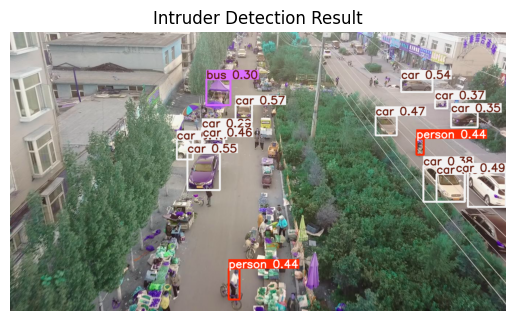

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load trained model
model = YOLO("/content/yolov8n.pt")

# Test image path
test_image = "/content/visdrone/VisDrone2019-DET-test-challenge/VisDrone2019-DET-test-challenge/33f649578a2a3ed55b7b4a9a3ebe65bb90092a4d128f079fadb02b1135d31d3f.jpeg"

# Run prediction
results = model(test_image)

# Show result
res_plotted = results[0].plot()  # NumPy image
plt.imshow(res_plotted)
plt.axis('off')
plt.title("Intruder Detection Result")
plt.show()


image 1/1 /content/visdrone/VisDroneYOLO/images/train/0000070_05880_d_0000005.jpg: 384x640 15 persons, 9.0ms
Speed: 3.2ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


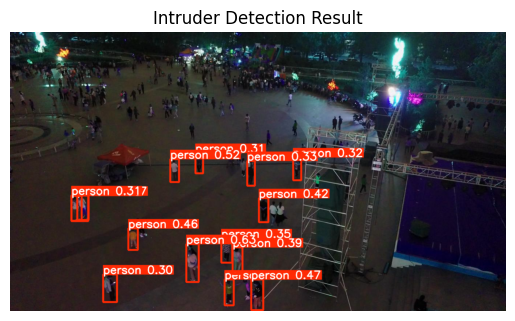

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load trained model
model = YOLO("/content/yolov8n.pt")

# Test image path
test_image = "/content/visdrone/VisDroneYOLO/images/train/0000070_05880_d_0000005.jpg"

# Run prediction
results = model(test_image)

# Show result
res_plotted = results[0].plot()  # NumPy image
plt.imshow(res_plotted)
plt.axis('off')
plt.title("Intruder Detection Result")
plt.show()